In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import dc_stat_think as dcst
import datetime
from datetime import datetime as datetime2
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import random
from scipy.stats import binom,norm
import math
from sklearn.preprocessing import LabelEncoder
from pandas_datareader import data as pdr

In [271]:
year_start = '2020-03-29'
year_end = '2021-04-10'

df = pd.DataFrame(pd.date_range(year_start, year_end, freq=f'W-SAT'), columns=['week_date'])
df['week_number']=df['week_date'].apply(lambda row: datetime.date(row.year, row.month, row.day).isocalendar()[1])
#print(df)

first_day_of_year = df.iloc[0, 0].replace(day=1, month=1)
baseline = pd.Series(pd.date_range(first_day_of_year, periods=len(df), freq=f'W-SAT'))
#print(baseline)

df['baseline_date']=baseline
df['baseline_week_number']=df['baseline_date'].apply(lambda row: datetime.date(row.year, row.month, row.day).isocalendar()[1])
print(df)


    week_date  week_number baseline_date  baseline_week_number
0  2020-04-04           14    2020-01-04                     1
1  2020-04-11           15    2020-01-11                     2
2  2020-04-18           16    2020-01-18                     3
3  2020-04-25           17    2020-01-25                     4
4  2020-05-02           18    2020-02-01                     5
5  2020-05-09           19    2020-02-08                     6
6  2020-05-16           20    2020-02-15                     7
7  2020-05-23           21    2020-02-22                     8
8  2020-05-30           22    2020-02-29                     9
9  2020-06-06           23    2020-03-07                    10
10 2020-06-13           24    2020-03-14                    11
11 2020-06-20           25    2020-03-21                    12
12 2020-06-27           26    2020-03-28                    13
13 2020-07-04           27    2020-04-04                    14
14 2020-07-11           28    2020-04-11               

In [272]:
data = {'start': [0,4,8],'stop': [3,7,9]}
df = pd.DataFrame(data)

# setup sample df_a with Framecount as fc, and probability as prob
np.random.seed(365)
rows=15
df_a = pd.DataFrame({'fc': range(rows), 'prob': np.random.randint(1, 10, (rows, 5)).tolist()})
print(df_a)
idx = pd.IntervalIndex.from_arrays(df.start, df.stop, closed='both')
print(idx.get_indexer(df_a.fc))
grouped=df_a.groupby(idx.get_indexer(df_a.fc)).agg({'prob': list}).prob.map(np.sum)
print(grouped)


    fc             prob
0    0  [3, 5, 2, 6, 3]
1    1  [3, 9, 5, 1, 4]
2    2  [4, 8, 8, 8, 1]
3    3  [9, 5, 4, 3, 7]
4    4  [3, 7, 9, 7, 2]
5    5  [7, 6, 8, 8, 7]
6    6  [6, 4, 9, 8, 1]
7    7  [2, 5, 1, 7, 6]
8    8  [7, 6, 4, 3, 8]
9    9  [3, 7, 7, 4, 8]
10  10  [8, 2, 8, 1, 3]
11  11  [6, 3, 7, 8, 8]
12  12  [5, 8, 5, 4, 1]
13  13  [6, 5, 4, 5, 7]
14  14  [6, 8, 8, 1, 1]
[ 0  0  0  0  1  1  1  1  2  2 -1 -1 -1 -1 -1]
-1    128
 0     98
 1    113
 2     57
Name: prob, dtype: int64


In [273]:
import re

original_array = np.array( [4, 5, 2, 8, 4, 7, 2, 64, 2, 57, 2, 45, 7, 43, 2, 5, 7, 3, 3, 6523, 3, 4, 3, 0, -65, -343])
digit_re = re.compile('[2]{1}')
[print (x) for x in original_array if not digit_re.search(str(x))]

4
5
8
4
7
64
57
45
7
43
5
7
3
3
3
4
3
0
-65
-343


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [274]:
exam_scores = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19]}
df = pd.DataFrame(exam_scores)
df.set_index('name',inplace=True)
print(df.index)


Index(['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael',
       'Matthew', 'Laura', 'Kevin', 'Jonas'],
      dtype='object', name='name')


[-13.90521118 -13.5506428  -13.08478734 -12.51112497 -11.83374521
 -11.05721556 -10.1864488   -9.22657614  -8.18283203  -7.06045399
  -5.86459943  -4.60027958  -3.27230967  -1.88527376  -0.4435021
   1.048941     2.58826105   4.17093084   5.79368304   7.45349962
   9.14759892  10.87342147  12.62861518  14.41102042  16.21865534
  18.04970177  19.9024918   21.77549509  23.66730716  25.57663843
  27.50230417  29.44321527  31.3983698   33.36684531  35.3477918
  37.34042535  39.3440223   41.35791402  43.38148215  45.41415422
  47.45539976]
[-16.16748796 -14.91712669 -13.52636453 -12.0174973  -10.40970064
  -8.71911226  -6.9591357   -5.14082445  -3.27326735  -1.36393757
   0.5810082    2.55648137   4.55825887   6.58281972   8.62721398
  10.68895764  12.76594853  14.85639872  16.95878018  19.07178081
  21.19426878  23.3252635   25.46391182  27.60946848  29.76127996
  31.91877107  34.08143379  36.24881791  38.4205232   40.59619271
  42.77550724  44.95818048  47.14395498  49.33259863  51.523901

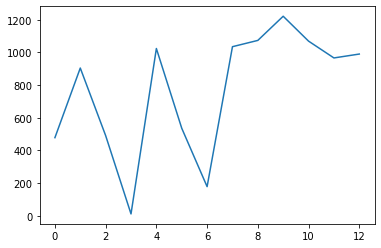

In [275]:
#x1=33.19
#x2=73.8
x1=np.linspace(73,75,num=41)
y1=np.linspace(33,35,num=41)
#print(x1)

v=3.5
t_error=[]

for i, j, k in [[71.91500,33.82850, 57.2], [72.32200,33.16267, 38.28], [72.57900, 33.61317, 37.48], [73.44883, 33.83300, 27.8], [71.52967,33.15267, 58.8],
             [73.27017,33.65167, 18.44], [73.14017, 33.75200, 29.97], [72.46550,32.63183, 39.98], [73.22900, 32.99867, 14.77], [72.67167, 31.92100, 48.71], 
             [71.91817, 32.53983, 54.73],[71.92333,33.04400, 49.67],[71.74417,32.79617, 57.39]]:
    u=((np.sqrt((y1-j)**2 + (x1-i)**2)/v)*111 - k)
    print(u)
    c=np.sum(u)
    t_error.append(c)
    #print(c)
    #c.append(t_error)
plt.plot(t_error)

In [276]:
time=np.linspace(0,1000,100)
print(time[-1])

1000.0


x=0.050, y=10.000
x=0.050, y=5.000


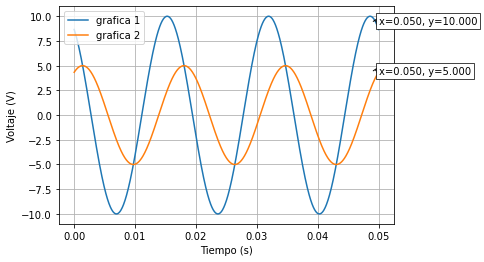

In [277]:
def h(X):
        return (10*(np.cos(((120*(np.pi))*x)+((np.pi/6)))))

def g(x):
        return (5*(np.cos(((120*(np.pi))*x)-((np.pi/6)))))

x = np.linspace(0, 0.05, 1000)

plt.ylabel("Voltaje (V)")
plt.xlabel("Tiempo (s)")
plt.grid(True)

def annot_max(x,y, ax=None):
    xmax = x.max()
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    print(text)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
    ax.annotate(text,xy=(xmax,ymax),**kw)

plt.plot(x,h(x), label="grafica 1")  
plt.plot(x,g(x), label="grafica 2")
plt.legend(loc=0)
annot_max(x,h(x))
annot_max(x,g(x))
plt.show() 

In [278]:
df = pd.DataFrame({
    'price': [2, 13, 24, 15, 11, 44], 
    'category': ["shirts", "pants", "shirts", "tops", "hat", "tops"],
})
grouped=df.groupby('category')

shirts=grouped.get_group('shirts')
#print(shirts.price.max())
df['price_r']=df['category'].apply(lambda row: grouped.get_group(row).price.max())

df=df.sort_values(['category','price','price_r'], ascending=False)
print(df)


   price category  price_r
5     44     tops       44
3     15     tops       44
2     24   shirts       24
0      2   shirts       24
1     13    pants       13
4     11      hat       11


In [279]:
print(uniform.cdf(7,0,12))

C =uniform.rvs(loc=0,scale=4)
print(C)

0.5833333333333334
3.178289336173405


In [280]:

df=pd.read_csv('CC_data')
print(df.columns)
df['Approved']=[1 if x=="+" else 0 for x in df['Approved']]
encoder = LabelEncoder()
df['Male']=encoder.fit_transform(df['Male'])
df['Married']=encoder.fit_transform(df['Married'])
df['Employed']=encoder.fit_transform(df['Employed'])
df['PriorDefault']=encoder.fit_transform(df['PriorDefault'])
df['Citizen']=encoder.fit_transform(df['Citizen'])
df['DriversLicense']=encoder.fit_transform(df['DriversLicense'])
df['BankCustomer']=encoder.fit_transform(df['BankCustomer'])
df['EducationLevel']=encoder.fit_transform(df['EducationLevel'])
df['ZipCode']=pd.to_numeric(df['ZipCode'],errors='coerce').fillna(0)
df['Age']=pd.to_numeric(df['Age'],errors='coerce').fillna(0)
ohe=pd.get_dummies(df['Ethnicity'],prefix="ethnicity_")
df=pd.concat([df,ohe],axis=1)
df=df.drop('Ethnicity',axis=1)
NUMERIC=[ column for column in df.columns if np.issubdtype(df[column],np.number) ]
TEXT=[ column for column in df.columns if np.issubdtype(df[column],np.number)==False ]

X=df[[x for x in NUMERIC if x!='Approved']]
y=df['Approved']

#print(len(NUMERIC))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

logreg=LogisticRegression(C=5,max_iter=10000)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
parameter_grid={'C':[uniform.rvs(loc=0,scale=4),3,4,10,100],'tol':[0.1,0.2,0.3,0.5,1,5,10,100]}  

clf = RandomizedSearchCV(logreg, parameter_grid,
                         n_iter = 10,
                         scoring='accuracy',
                         cv=5,
                         refit=True, 
                         return_train_score = True,
                         random_state=0)

search = clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

print("Model accuracy {}%".format(accuracy_score(y_test,predictions)*100))

cv_results_df = pd.DataFrame(clf.cv_results_)

column = cv_results_df.loc[:, ['params']]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1 ]
print(best_row)

#print(clf.cv_results_)
#print(clf.best_index_)
print(clf.best_params_)
print(clf.best_score_)

#print(clf.cv_results_df.loc[:,"params"])


Index(['Unnamed: 0', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')
Model accuracy 83.33333333333334%
                                params
0                  {'tol': 10, 'C': 4}
1                   {'tol': 1, 'C': 4}
2                {'tol': 0.2, 'C': 10}
3  {'tol': 1, 'C': 2.1555536467206022}
4                 {'tol': 0.3, 'C': 3}
5                 {'tol': 100, 'C': 3}
6                  {'tol': 1, 'C': 10}
7                 {'tol': 0.5, 'C': 3}
8                 {'tol': 0.3, 'C': 4}
9                  {'tol': 5, 'C': 10}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_tol  \
2       0.585019      0.111771         0.001196        0.000401       0.2   

  param_C                 params  split0_test_score  split1_test_score  \
2      10  {'tol': 0.2, 'C': 10}        

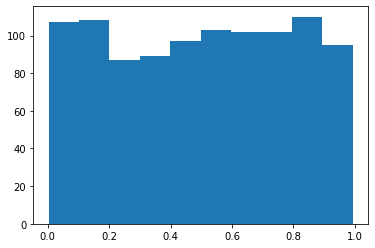

0.05347327241649602


In [281]:
min_number=0
max_number=1
size=1000

number_pool= uniform.rvs(min_number,max_number,size=size)
#print(number_pool)

plt.hist(number_pool)
plt.show()

def getValue(number_pool):
    val=random.choice(number_pool)
    if val>.5: 
        val+=5
    return val
print(getValue(number_pool))
#random_index = random.randrange(len(number_pool))

[509]


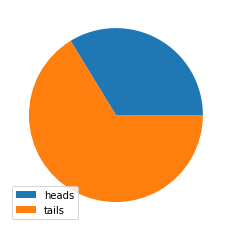

In [282]:
flips=binom.rvs(1000,0.5,size=1)
print(flips)
plt.pie([flips,1000])
plt.legend(['heads','tails'])
plt.show()

In [283]:
heads=binom.pmf(7,10,0.5)
print("probability of getting heads for 7 of 10 flips", heads)

probability of getting heads for 7 of 10 flips 0.11718750000000014


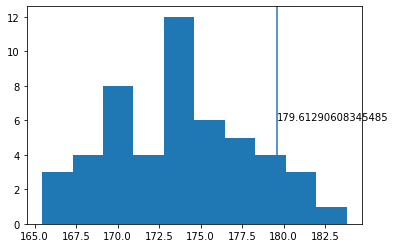

In [284]:
mean=172.7815
std=4.1532
N = 50

results=norm.rvs(mean,std, size=N)
#print(results)
pct_5 = norm.ppf(.95,mean,std)
#print(pct_5)
plt.hist(results,bins=10)
plt.axvline(pct_5)
plt.annotate(pct_5,xy=(pct_5,6))
plt.show()




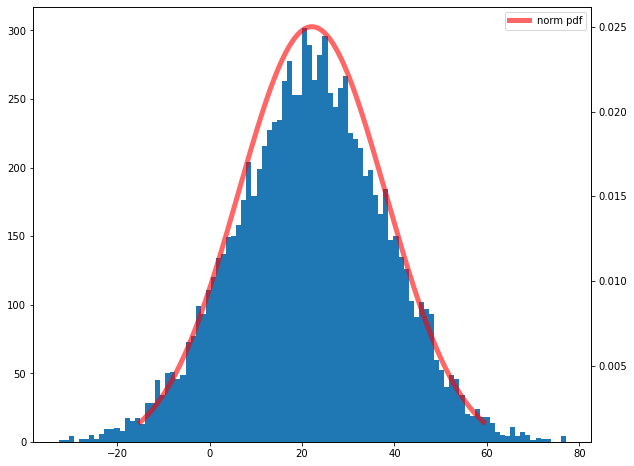

In [285]:
tds = [28.965, 12.172, 17.042, 36.98, 20.323, 3.481, 18.43, 5.638,20.763, 48.104, 8.015, 21.2, 48.122, 32.51, 16.87, 
        10.402, 7.896, 3.827, 0.078, 18.63, 42.428, 0.975, 11.392, 15.937, 4.531, 44.635, 10.457, 53.821, 43.046, 39.572,
        6.31, 52.039, 36.726, 19.67, 43.719, 9.421, 2.798, 20.013, 32.888, 43.622, 13.093, 38.688, 57.199, 13.627, 42.571,
        34.076, 18.812, 49.251, 57.412, 35.089, 8.093, 15.141, 58.05, 17.936, 4.673, 5.475, 11.731, 46.649, 12.403, 6.442,
        22.542, 44.069, 7.893, 26.484, 4.199, 6.575, 3.209, 32.125, 40.202, 37.918, 27.567, 22.634, 43.355, 44.481, 17.854,
        29.538, 2.39, 16.52, 34.321, 8.003, 28.034, 20.963, 16.509, 26.279, 13.541, 22.654, 32.074, 9.474, 1.054, 11.612,
        2.108, 19.015, 0.864, 7.577, 9.927, 7.295, 6.689, 13.908, 2.063, 31.57]

mean=np.mean(tds)
std=np.std(tds)
N=10000

fig,ax=plt.subplots(figsize=(10,8))
results=norm.rvs(mean,std, size=N)
ax.hist(results,bins=100)
twin_ax=ax.twinx()
x = np.linspace(norm(mean, std).ppf(0.01),
                norm(mean, std).ppf(0.99), N)
twin_ax.plot(x, norm(mean, std).pdf(x),   'r-', lw=5, alpha=0.6, label='norm pdf')
plt.legend()
plt.show()

In [370]:
data=[
('2019-02-07 01:00:00',  15,    12,    10),
('2019-02-07 02:00:00',    np.nan,   11,    9),
('2019-02-07 03:00:00',    10,    11,    3),
('2019-01-31 22:00:00',   11,    np.nan,   4),
('2019-01-31 02:00:00',   np.nan,    12,    4),
('2019-01-24 02:00:00',   10,    10,    float('nan'))]

df=pd.DataFrame(data,columns=['date','acct1','acct2','acct3'])
df['date']=df['date'].apply(lambda row: datetime2.strptime(str(row),"%Y-%m-%d %H:%M:%S"))
df['dow']=df['date'].apply(lambda row: row.dayofweek)
df['hour']=df['date'].apply(lambda row: row.hour)
df.set_index('date')

grouped_acct1=df.groupby(['dow','hour'])['acct1'].mean()
grouped_acct2=df.groupby(['dow','hour'])['acct2'].mean()
grouped_acct3=df.groupby(['dow','hour'])['acct3'].mean()

for key,item in df.iterrows():
    #print(item.dow,item.hour)
    df.loc[key,'acct1_mean']=grouped_acct1[(grouped_acct1.index.get_level_values(0)==item.dow) & (grouped_acct1.index.get_level_values(1)==item.hour)].values
    df.loc[key,'acct2_mean']=grouped_acct2[(grouped_acct2.index.get_level_values(0)==item.dow) & (grouped_acct2.index.get_level_values(1)==item.hour)].values
    df.loc[key,'acct3_mean']=grouped_acct3[(grouped_acct3.index.get_level_values(0)==item.dow) & (grouped_acct3.index.get_level_values(1)==item.hour)].values
    #print(key,item)


for key,item in df.iterrows():
    if math.isnan(item['acct1']):
        df.loc[key,'acct1']=item['acct1_mean'] 
    else: 
        df.loc[key,'acct1']=item['acct1']   

    if math.isnan(item['acct2']):
        df.loc[key,'acct2']=item['acct2_mean'] 
    else: 
        df.loc[key,'acct2']=item['acct2']   

    if math.isnan(item['acct3']):
        df.loc[key,'acct3']=item['acct3_mean'] 
    else: 
        df.loc[key,'acct3']=item['acct3']   

print(df)

                 date  acct1  acct2  acct3  dow  hour  acct1_mean  acct2_mean  \
0 2019-02-07 01:00:00   15.0   12.0   10.0    3     1        15.0        12.0   
1 2019-02-07 02:00:00   10.0   11.0    9.0    3     2        10.0        11.0   
2 2019-02-07 03:00:00   10.0   11.0    3.0    3     3        10.0        11.0   
3 2019-01-31 22:00:00   11.0    NaN    4.0    3    22        11.0         NaN   
4 2019-01-31 02:00:00   10.0   12.0    4.0    3     2        10.0        11.0   
5 2019-01-24 02:00:00   10.0   10.0    6.5    3     2        10.0        11.0   

   acct3_mean  
0        10.0  
1         6.5  
2         3.0  
3         4.0  
4         6.5  
5         6.5  


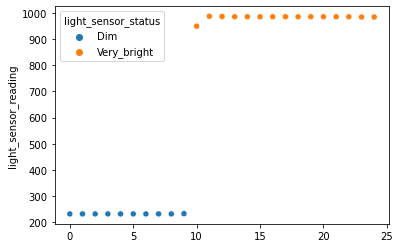

correlation  0.9998202098949396


In [383]:
Light_Sensor_Reading=[231,231,231,231,231,231,231,231,231,232,950,988,987,986,986,986,986,986,986,986,986,986,986,985,985]
Light_Sensor_Status=['Dim','Dim','Dim','Dim','Dim','Dim','Dim','Dim','Dim','Dim','Very_bright','Very_bright','Very_bright',\
'Very_bright','Very_bright','Very_bright','Very_bright','Very_bright','Very_bright','Very_bright','Very_bright',\
'Very_bright','Very_bright','Very_bright','Very_bright']
df=pd.DataFrame({'light_sensor_reading':Light_Sensor_Reading,'light_sensor_status':Light_Sensor_Status})
#print(df)
x=range(len(df))
sns.scatterplot(x=x, y='light_sensor_reading',data=df,hue='light_sensor_status')
plt.show()
encoder=LabelEncoder()
encoder.fit(df['light_sensor_status'])
df['light_sensor_status_enc']=encoder.transform(df['light_sensor_status'])
corr=df['light_sensor_reading'].corr(df['light_sensor_status_enc'])

print("correlation ",corr)

In [399]:
current_date=datetime.datetime.now()
print(current_date)
start_date=datetime.datetime(current_date.year,1,1)
a1 = pdr.get_data_yahoo("NIO",start_date,current_date).reset_index()
print(a1)

2021-04-14 14:02:54.858872
         Date        High         Low        Open       Close      Volume  \
0  2021-01-04  223.000000  214.809998  222.529999  217.690002  37130100.0   
1  2021-01-05  218.520004  215.699997  217.259995  217.899994  23823000.0   
2  2021-01-06  216.490005  211.940002  212.169998  212.250000  35930700.0   
3  2021-01-07  219.339996  213.710007  214.039993  218.289993  27694500.0   
4  2021-01-08  220.580002  217.029999  218.679993  219.619995  22956200.0   
..        ...         ...         ...         ...         ...         ...   
65 2021-04-08  254.139999  252.000000  252.770004  253.250000  23625200.0   
66 2021-04-09  255.990005  252.440002  252.869995  255.850006  24315700.0   
67 2021-04-12  257.670013  254.619995  254.710007  255.910004  27148700.0   
68 2021-04-13  259.190002  256.829987  257.260010  258.489990  23820600.0   
69 2021-04-14  258.829987  255.160004  257.475006  255.589996  21771277.0   

     Adj Close  
0   217.189774  
1   217.399292